# Data Science

## 6 Steps when completing a data science project
### Step 1. Define the problem
### Step 2. Gather data
### Step 3. Explore data
### Step 4. Model with data
### Step 5. Evaluate model
### Step 6. Answer the problem

# Step 1. Define the problem

### Let's say we work for a pharmaceutical company and they want to manufacture an appropiate amount of pills so they can prevent having a surplus and overspend. They recently got a dataset that shows a listen of conditions that a patient has and the medication that they're taking (Medication A,B,C,X,Y). They asked you to look at this data and see who is likely to take a medication based on their conditions because they have census of a new city that they want to promote their new drugs to and want to know based on that census, how many people will liekly need which drug.

# Step 2. Gather data

## This data will be given to you but in the future you will have to find a dataset to help answer the problem you have on your own.

In [2]:
import pandas as pd

In [4]:
drug_data = pd.read_csv('../Data/drug200.csv')
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Step 3. Explore data

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### Now that we have our data, let's explore it, we will be looking at several things:

### - Are there missing values?
### - Are there any outliers?
### - What is the average?
### - What is the correlation of our features?


In [6]:
drug_data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

 ## Are there missing values?

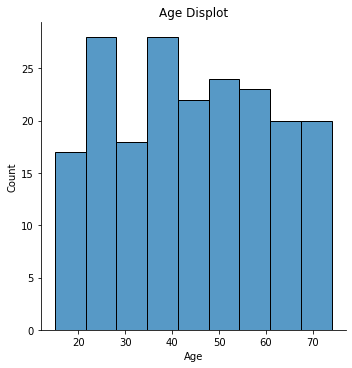

In [7]:
sns.displot(data = drug_data.Age)
plt.title('Age Displot');

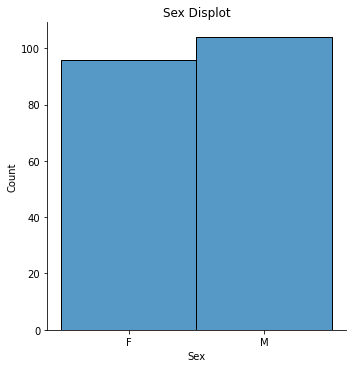

In [8]:
sns.displot(data = drug_data.Sex)
plt.title('Sex Displot');

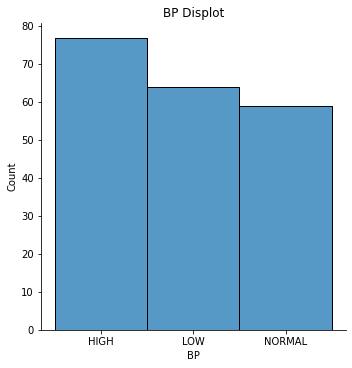

In [9]:
sns.displot(data = drug_data.BP)
plt.title('BP Displot');

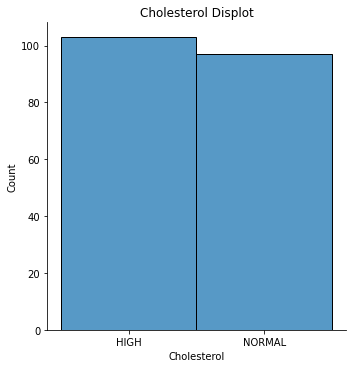

In [10]:
sns.displot(data = drug_data.Cholesterol)
plt.title('Cholesterol Displot');

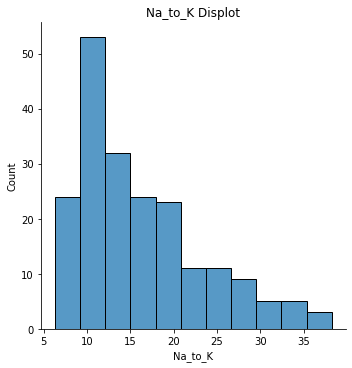

In [11]:
sns.displot(data = drug_data.Na_to_K)
plt.title('Na_to_K Displot');

### What's the code to look at the distribution for age?

In [ ]:
sns.displot(data =drug_data.Drug)
plt.title('Drug displot');

## Are there any outliers?

# Averages

In [26]:
drug_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [32]:
drug_data.Age.mean()

44.315

In [30]:
drug_data.Sex.mean()

TypeError: Could not convert FMMFFFFMMMFFMFFFMMMFMMMFFFMFFMFMMFMMMMFMFFMMFFFMMFFMMFFFMMMMFMMMFFMMMFMFFFMMFFFFMMFFFMFMFFMMFFMMFFMFMFFMMMMMMMMFMFFMMFFFMMMFFFMMMFFMMMFMFFMFMFMMMMFFFMMMMFMMMMFFFFMFMMFFFFFMFFMFMMMFFFFFFFMMMMMMMMFFMMMF to numeric

In [34]:
drug_data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

# Your data needs to be numerical if you want to use it

In [35]:
drug_data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [39]:
drug_data.Sex.replace({'M':1,'F':0},inplace=True)

In [40]:
drug_data.Sex.value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [41]:
drug_data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [46]:
drug_data.BP.replace({'LOW':0,'NORMAL':1,'HIGH':2},inplace=True)

In [47]:
drug_data.BP.value_counts()

2    77
0    64
1    59
Name: BP, dtype: int64

In [48]:
drug_data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [49]:
drug_data.Cholesterol.replace({'NORMAL':0,'HIGH':1},inplace=True)

In [50]:
drug_data.Cholesterol.value_counts()

1    103
0     97
Name: Cholesterol, dtype: int64

In [52]:
drug_data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [58]:
drug_data.Drug.replace({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4},inplace=True)

In [59]:
drug_data.Drug.value_counts()

4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64

In [60]:
drug_data.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

## Yes we did it, all numerical! Now to look at averages but with a definition to ake life easier

In [69]:
def avg():
    for column in drug_data.columns:
        print(column,':',drug_data[column].mean())
        

In [70]:
avg()

Age : 44.315
Sex : 0.52
BP : 1.065
Cholesterol : 0.515
Na_to_K : 16.08448499999999
Drug : 2.87


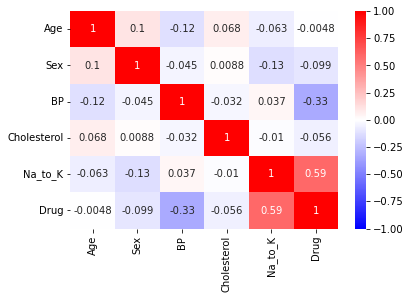

In [77]:
sns.heatmap(drug_data.corr(),vmin=-1, vmax=1, annot=True, cmap='bwr');

# Step 4. Model the data

### This is a classification problem, we are looking to see which drug is it based on the information give. which drug, drugA,drugB,drugC,drugX,drugY?

### Choose your columns and split the data to train and to test on

In [81]:
X = drug_data.drop('Drug',axis=1)
y = drug_data['Drug']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegression

In [86]:
logreg = LogisticRegression()

In [88]:
logreg.fit(X_train,y_train)

C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Step 5. Evaluate model

In [89]:
logreg.score(X_train,y_train)

0.9357142857142857

In [90]:
logreg.score(X_test,y_test)

0.85

# Step 6. Answer the problem

In [91]:
logreg.coef_

array([[-0.07567106,  0.33411878,  3.81737196,  0.22865258, -0.27498255],
       [ 0.06340099, -0.49804085,  2.05294963, -0.36561391, -0.33503412],
       [ 0.0081996 ,  0.79279131, -3.55222107,  1.84153825, -0.00440793],
       [ 0.0257175 , -0.47597017, -1.4153378 , -1.13291546,  0.02456084],
       [-0.02164703, -0.15289906, -0.90276271, -0.57166146,  0.58986376]])

In [92]:
logreg.feature_names_in_

array(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype=object)